  node  expired  inactive  rrep_wait  deleted
0   N0    58465     34444          0    24021
1   N4    54723     31373          0    23350
2   N6    56900     33226          1    23673
3   N9    86284     54866          2    31416
4  N10    65558     40953          0    24605
5  N11    71604     45880          0    25724
6  N17    74438     48895          3    25540
7  N22    63299     40730          1    22568
8  N29    62252     39343          2    22907


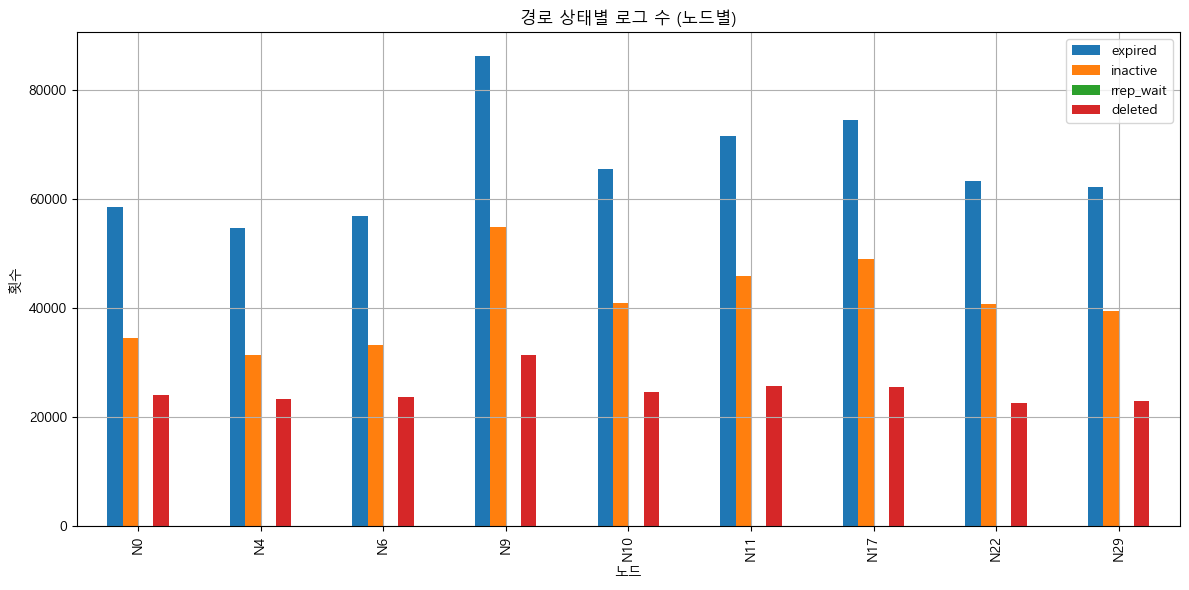

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pwdP = "/L"
pwdD = "/D400"
pwdS = "/S30"
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02" + pwdP + pwdD + pwdS
node_list = [0, 4, 6, 9, 10, 11, 17, 22, 29]

log_files = {
    'expired': 'lifetime_expired_log.csv',
    'inactive': 'inactive_transition_log.csv',
    'rrep_wait': 'rrep_wait_extend_log.csv',
    'deleted': 'route_deleted_log.csv'
}

summary = { 'node': [], 'expired': [], 'inactive': [], 'rrep_wait': [], 'deleted': [] }

for node in node_list:
    node_path = os.path.join(base_path, f"N{node}")
    summary['node'].append(f"N{node}")

    for key, filename in log_files.items():
        file_path = os.path.join(node_path, filename)
        
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path, header=None, names=['node', 'dest', 'time'])
            summary[key].append(len(df))
        else:
            summary[key].append(0)

df_summary = pd.DataFrame(summary)

print(df_summary)

df_summary.set_index('node').plot(kind='bar', figsize=(12,6), title='경로 상태별 로그 수 (노드별)')
plt.ylabel("횟수")
plt.xlabel("노드")
plt.grid(True)
plt.tight_layout()
plt.show()


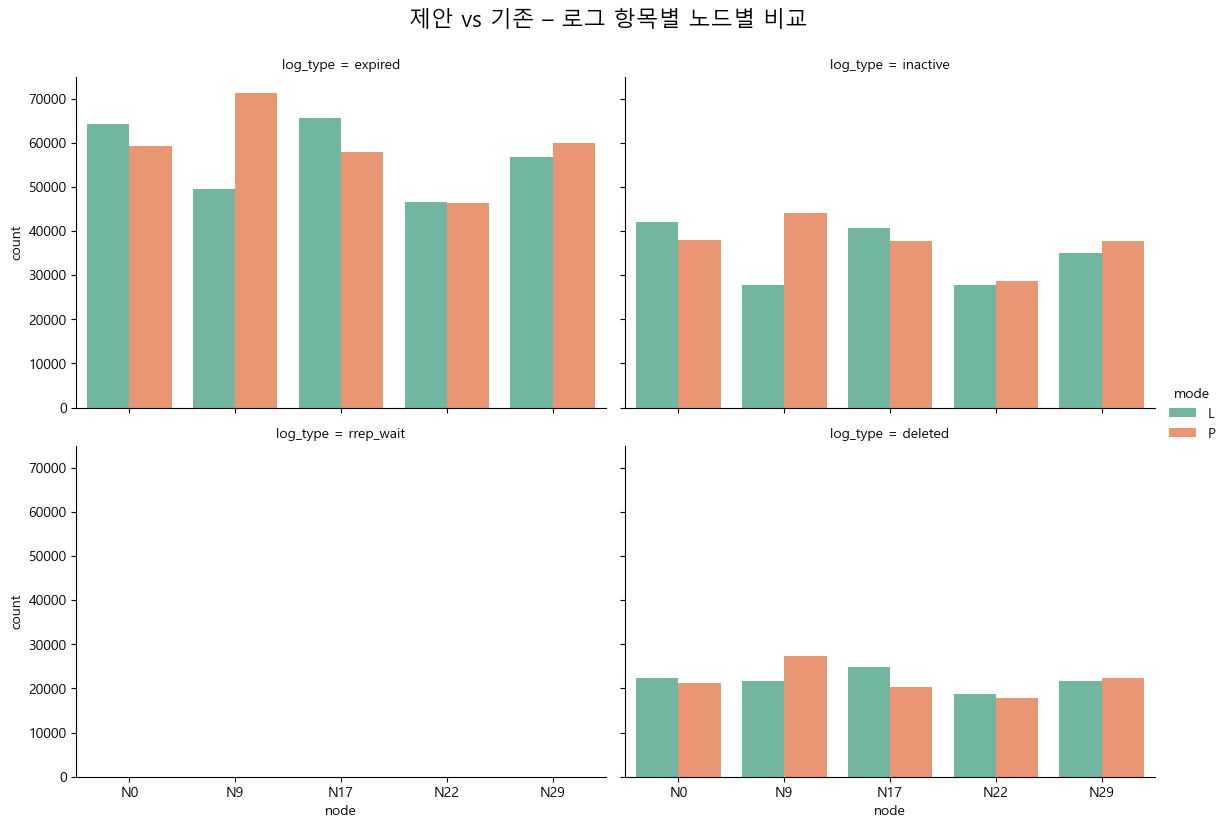

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 9, 17, 22, 29]
modes = ['L', 'P']
log_files = {
    'expired': 'lifetime_expired_log.csv',
    'inactive': 'inactive_transition_log.csv',
    'rrep_wait': 'rrep_wait_extend_log.csv',
    'deleted': 'route_deleted_log.csv'
}

records = []
for mode in modes:
    for node in node_list:
        row = {'mode': mode, 'node': f'N{node}'}
        node_path = os.path.join(base_path, mode, 'D400', 'S20', f'N{node}')
        for key, filename in log_files.items():
            file_path = os.path.join(node_path, filename)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, header=None, names=['node', 'dest', 'time'])
                row[key] = len(df)
            else:
                row[key] = 0
        records.append(row)

df_all = pd.DataFrame(records)
df_melt = df_all.melt(id_vars=['node', 'mode'], 
                      value_vars=log_files.keys(),
                      var_name='log_type', value_name='count')

g = sns.catplot(
    data=df_melt,
    x='node', y='count', hue='mode',
    col='log_type', kind='bar', col_wrap=2,
    height=4.2, aspect=1.4, palette='Set2'
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('제안 vs 기존 – 로그 항목별 노드별 비교', fontsize=16)

plt.show()


In [ ]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 4, 6, 9, 10, 11, 17, 22, 29]
modes = ['L', 'P']
log_files = {
    'expired': 'lifetime_expired_log.csv',
    'inactive': 'inactive_transition_log.csv',
    'rrep_wait': 'rrep_wait_extend_log.csv',
    'deleted': 'route_deleted_log.csv'
}

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S30', f'N{node}')
        row = {'mode': mode, 'node': f'N{node}'}
        
        for key, filename in log_files.items():
            file_path = os.path.join(node_path, filename)
            if os.path.isfile(file_path):
                df = pd.read_csv(file_path, header=None, names=['node', 'dest', 'time'])
                row[key] = len(df)
            else:
                row[key] = 0
        
        expired = row['expired'] if row['expired'] > 0 else 1
        row['inactive_ratio'] = round(row['inactive'] / expired, 3)
        row['deleted_ratio'] = round(row['deleted'] / expired, 3)
        
        records.append(row)

df_compare = pd.DataFrame(records)

print(df_compare)
# df_compare.to_csv("lifetime_behavior_compare.csv", index=False)


   mode node  expired  inactive  rrep_wait  deleted  inactive_ratio  \
0     L   N0    58465     34444          0    24021           0.589   
1     L   N4    54723     31373          0    23350           0.573   
2     L   N6    56900     33226          1    23673           0.584   
3     L   N9    86284     54866          2    31416           0.636   
4     L  N10    65558     40953          0    24605           0.625   
5     L  N11    71604     45880          0    25724           0.641   
6     L  N17    74438     48895          3    25540           0.657   
7     L  N22    63299     40730          1    22568           0.643   
8     L  N29    62252     39343          2    22907           0.632   
9     P   N0    58013     34121          0    23892           0.588   
10    P   N4    58328     34618          3    23707           0.594   
11    P   N6    56731     33254          0    23477           0.586   
12    P   N9    89501     57219          7    32275           0.639   
13    

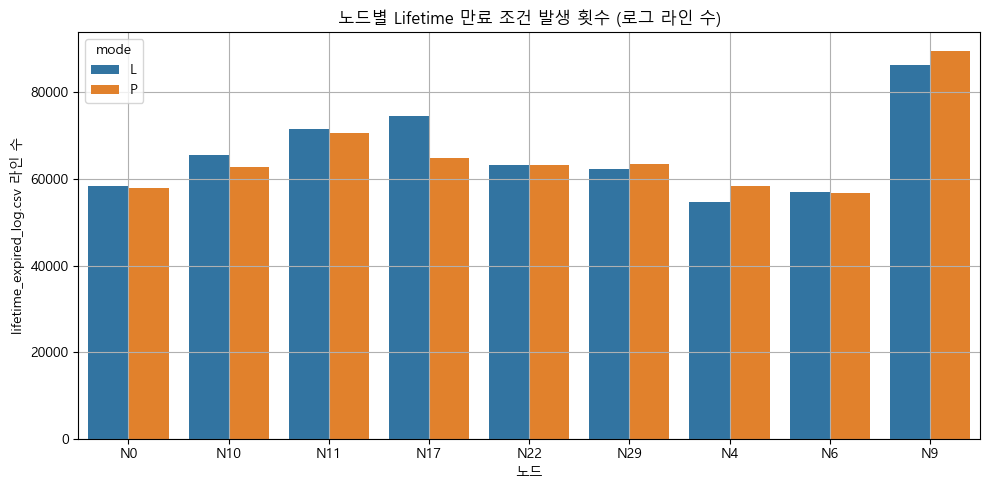

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 4, 6, 9, 10, 11, 17, 22, 29]
modes = ['L', 'P']
log_filename = "lifetime_expired_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S30', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'expired_log_count': count})

df_expired_log = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_expired_log.sort_values(by=['node', 'mode'])
import seaborn as sns
sns.barplot(x='node', y='expired_log_count', hue='mode', data=df_sorted)
plt.title('노드별 Lifetime 만료 조건 발생 횟수 (로그 라인 수)')
plt.ylabel('lifetime_expired_log.csv 라인 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()


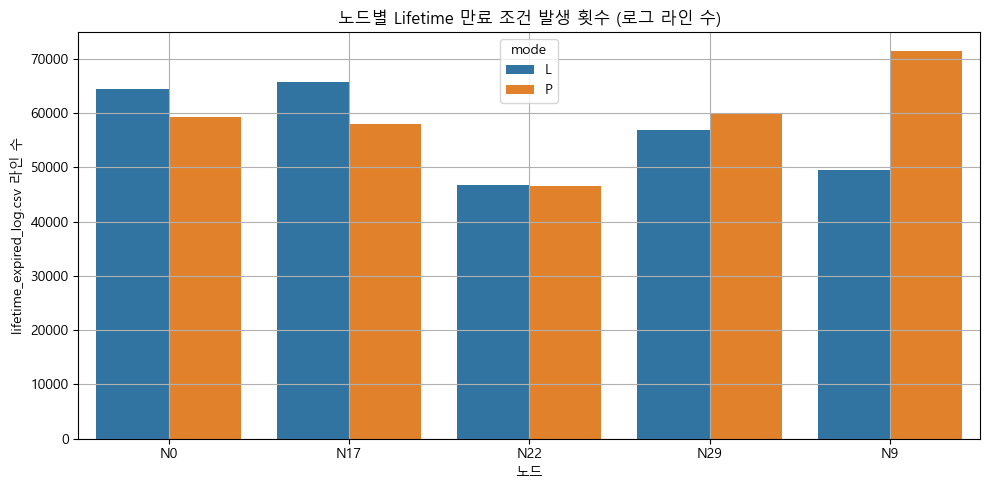

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 9, 17, 22, 29]
modes = ['L', 'P']
log_filename = "lifetime_expired_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S20', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'expired_log_count': count})

df_expired_log = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_expired_log.sort_values(by=['node', 'mode'])
import seaborn as sns
sns.barplot(x='node', y='expired_log_count', hue='mode', data=df_sorted)
plt.title('노드별 Lifetime 만료 조건 발생 횟수 (로그 라인 수)')
plt.ylabel('lifetime_expired_log.csv 라인 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()


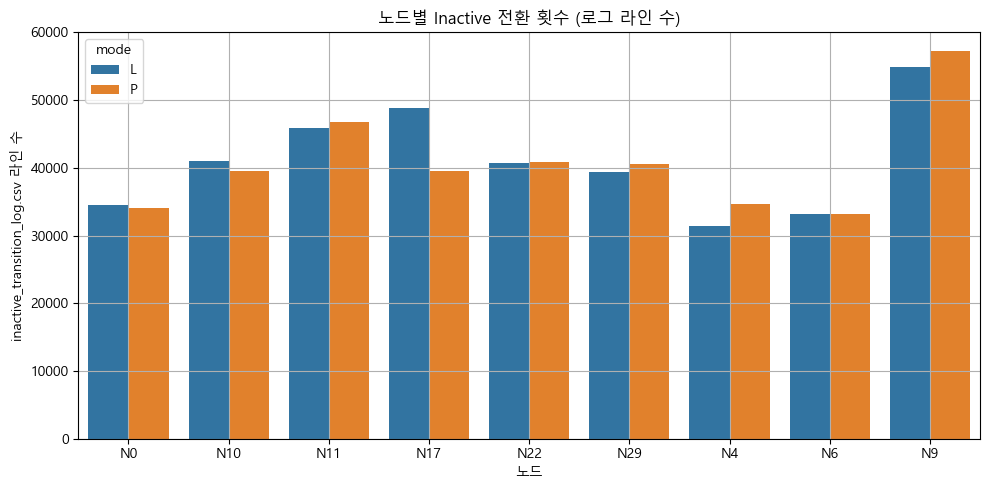

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 4, 6, 9, 10, 11, 17, 22, 29]
modes = ['L', 'P']
log_filename = "inactive_transition_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S30', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'inactive_log_count': count})

df_inactive_log = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_inactive_log.sort_values(by=['node', 'mode'])
sns.barplot(x='node', y='inactive_log_count', hue='mode', data=df_sorted)
plt.title('노드별 Inactive 전환 횟수 (로그 라인 수)')
plt.ylabel('inactive_transition_log.csv 라인 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()


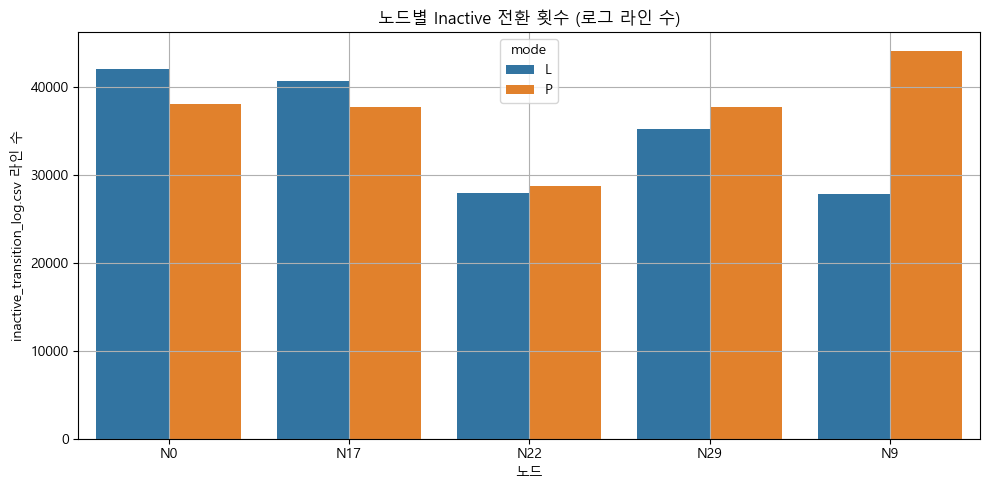

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 9, 17, 22, 29]
modes = ['L', 'P']
log_filename = "inactive_transition_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S20', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'inactive_log_count': count})

df_inactive_log = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_inactive_log.sort_values(by=['node', 'mode'])
sns.barplot(x='node', y='inactive_log_count', hue='mode', data=df_sorted)
plt.title('노드별 Inactive 전환 횟수 (로그 라인 수)')
plt.ylabel('inactive_transition_log.csv 라인 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()


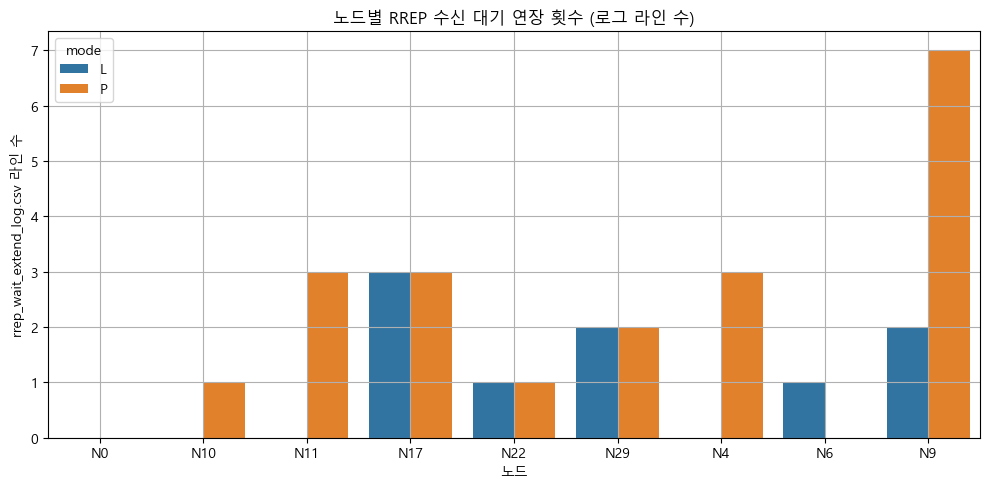

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 4, 6, 9, 10, 11, 17, 22, 29]
modes = ['L', 'P']
log_filename = "rrep_wait_extend_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S30', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'rrep_wait_extend_count': count})

df_rrep_wait = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_rrep_wait.sort_values(by=['node', 'mode'])
sns.barplot(x='node', y='rrep_wait_extend_count', hue='mode', data=df_sorted)
plt.title('노드별 RREP 수신 대기 연장 횟수 (로그 라인 수)')
plt.ylabel('rrep_wait_extend_log.csv 라인 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()


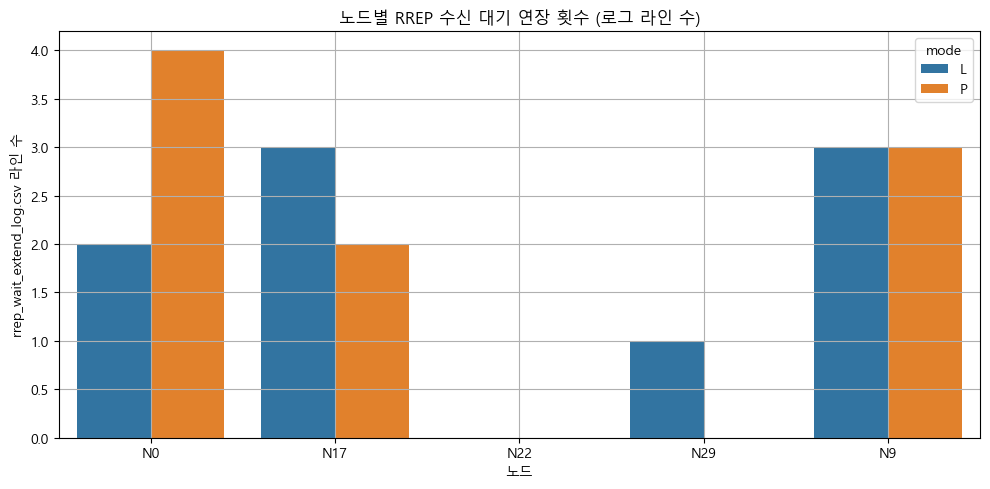

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 9, 17, 22, 29]
modes = ['L', 'P']
log_filename = "rrep_wait_extend_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S20', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'rrep_wait_extend_count': count})

df_rrep_wait = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_rrep_wait.sort_values(by=['node', 'mode'])
sns.barplot(x='node', y='rrep_wait_extend_count', hue='mode', data=df_sorted)
plt.title('노드별 RREP 수신 대기 연장 횟수 (로그 라인 수)')
plt.ylabel('rrep_wait_extend_log.csv 라인 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()


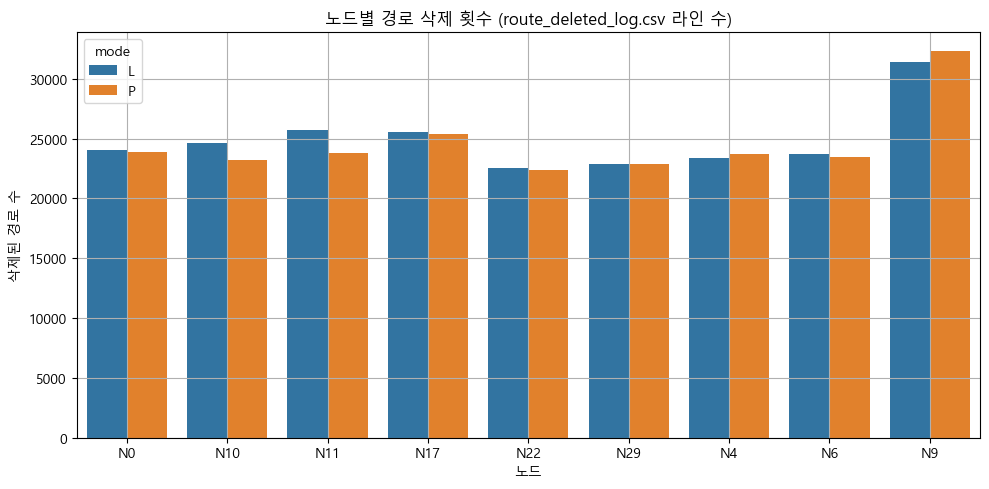

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 4, 6, 9, 10, 11, 17, 22, 29]
modes = ['L', 'P']
log_filename = "route_deleted_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S30', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'deleted_count': count})

df_deleted = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_deleted.sort_values(by=['node', 'mode'])
sns.barplot(x='node', y='deleted_count', hue='mode', data=df_sorted)
plt.title('노드별 경로 삭제 횟수 (route_deleted_log.csv 라인 수)')
plt.ylabel('삭제된 경로 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()


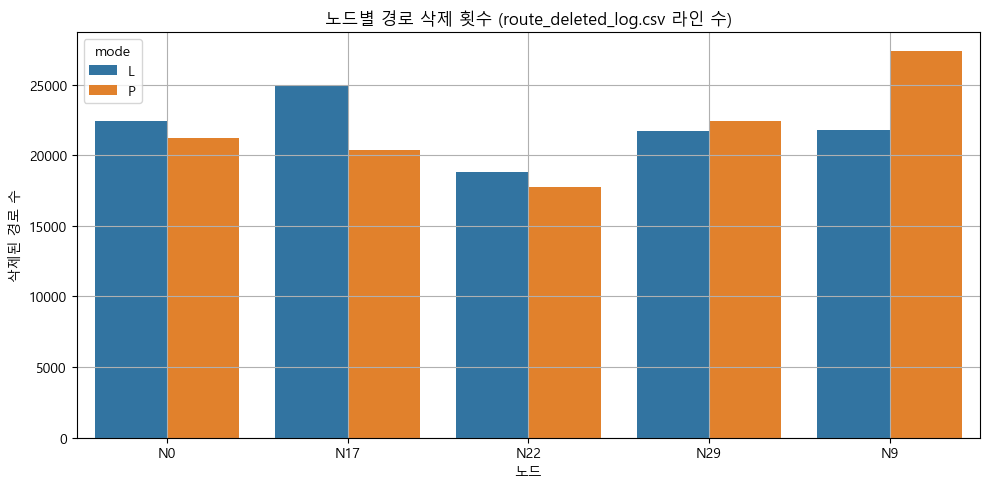

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
node_list = [0, 9, 17, 22, 29]
modes = ['L', 'P']
log_filename = "route_deleted_log.csv"

records = []

for mode in modes:
    for node in node_list:
        node_path = os.path.join(base_path, mode, 'D400', 'S20', f'N{node}')
        file_path = os.path.join(node_path, log_filename)
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                count = sum(1 for _ in f)
        records.append({'mode': mode, 'node': f'N{node}', 'deleted_count': count})

df_deleted = pd.DataFrame(records)

plt.figure(figsize=(10, 5))
df_sorted = df_deleted.sort_values(by=['node', 'mode'])
sns.barplot(x='node', y='deleted_count', hue='mode', data=df_sorted)
plt.title('노드별 경로 삭제 횟수 (route_deleted_log.csv 라인 수)')
plt.ylabel('삭제된 경로 수')
plt.xlabel('노드')
plt.grid(True)
plt.tight_layout()
plt.show()
